In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [2]:
train_dir='Skin Cancer Malignant vsBenign/train/'
test_dir='Skin Cancer Malignant vsBenign/test/'

In [3]:
size=224
from keras.applications.mobilenet_v2 import  preprocess_input
import tensorflow as tf
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train_dir,batch_size=16,target_size=(size,size),subset="training",shuffle=True)


Found 2374 images belonging to 2 classes.


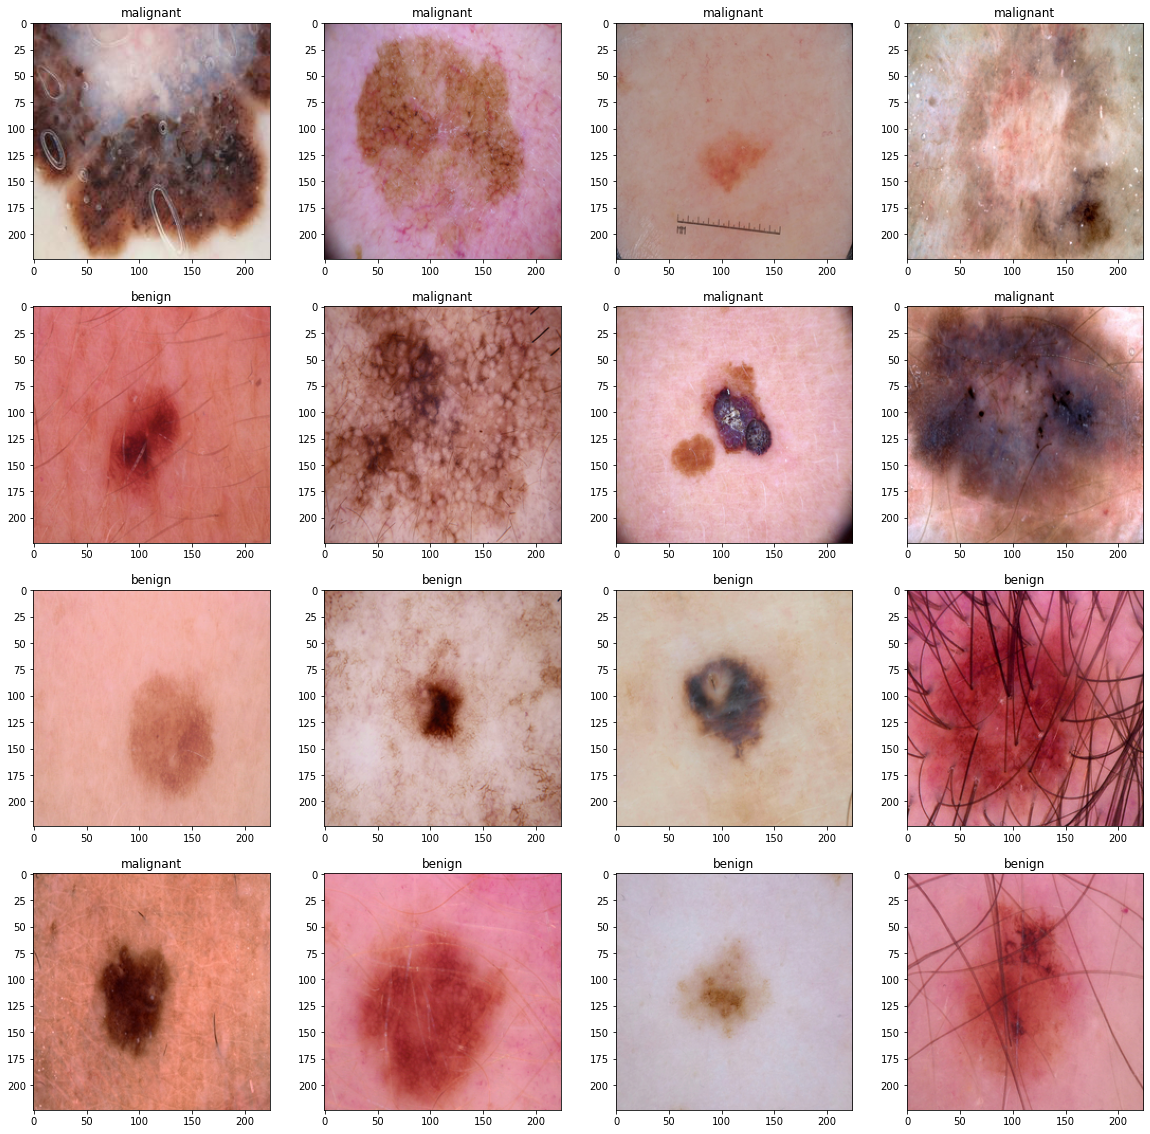

In [4]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [5]:
classes

['benign', 'malignant']

In [13]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train_dir,batch_size=16,target_size=(size,size),subset='validation',shuffle=False)


Found 263 images belonging to 2 classes.


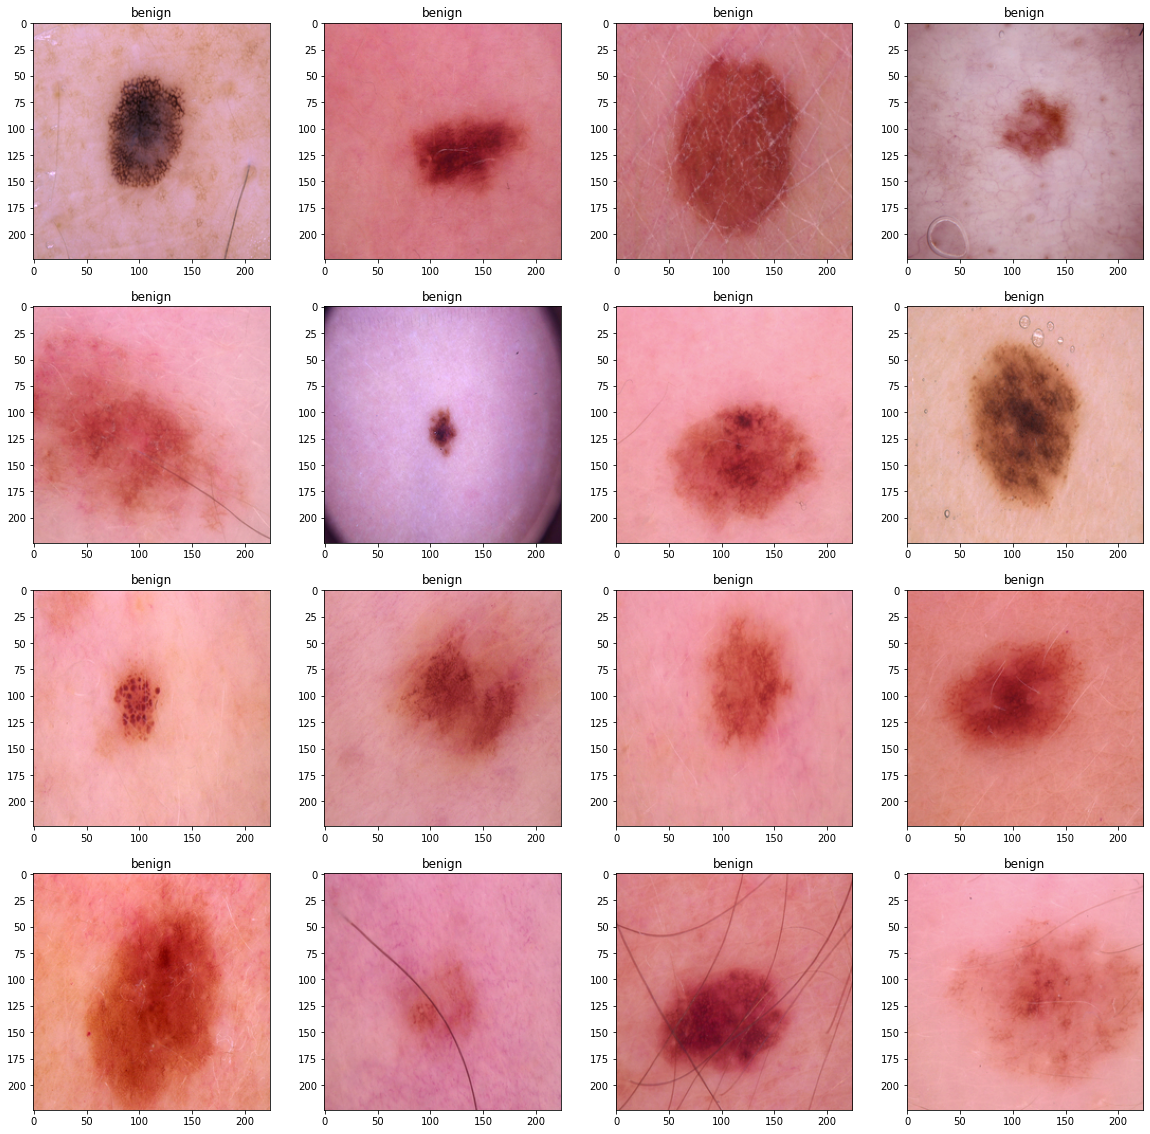

In [14]:
classes=list(valid_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in valid_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [15]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None
).flow_from_directory(test_dir,batch_size=16,target_size=(size,size),shuffle=False)


Found 660 images belonging to 2 classes.


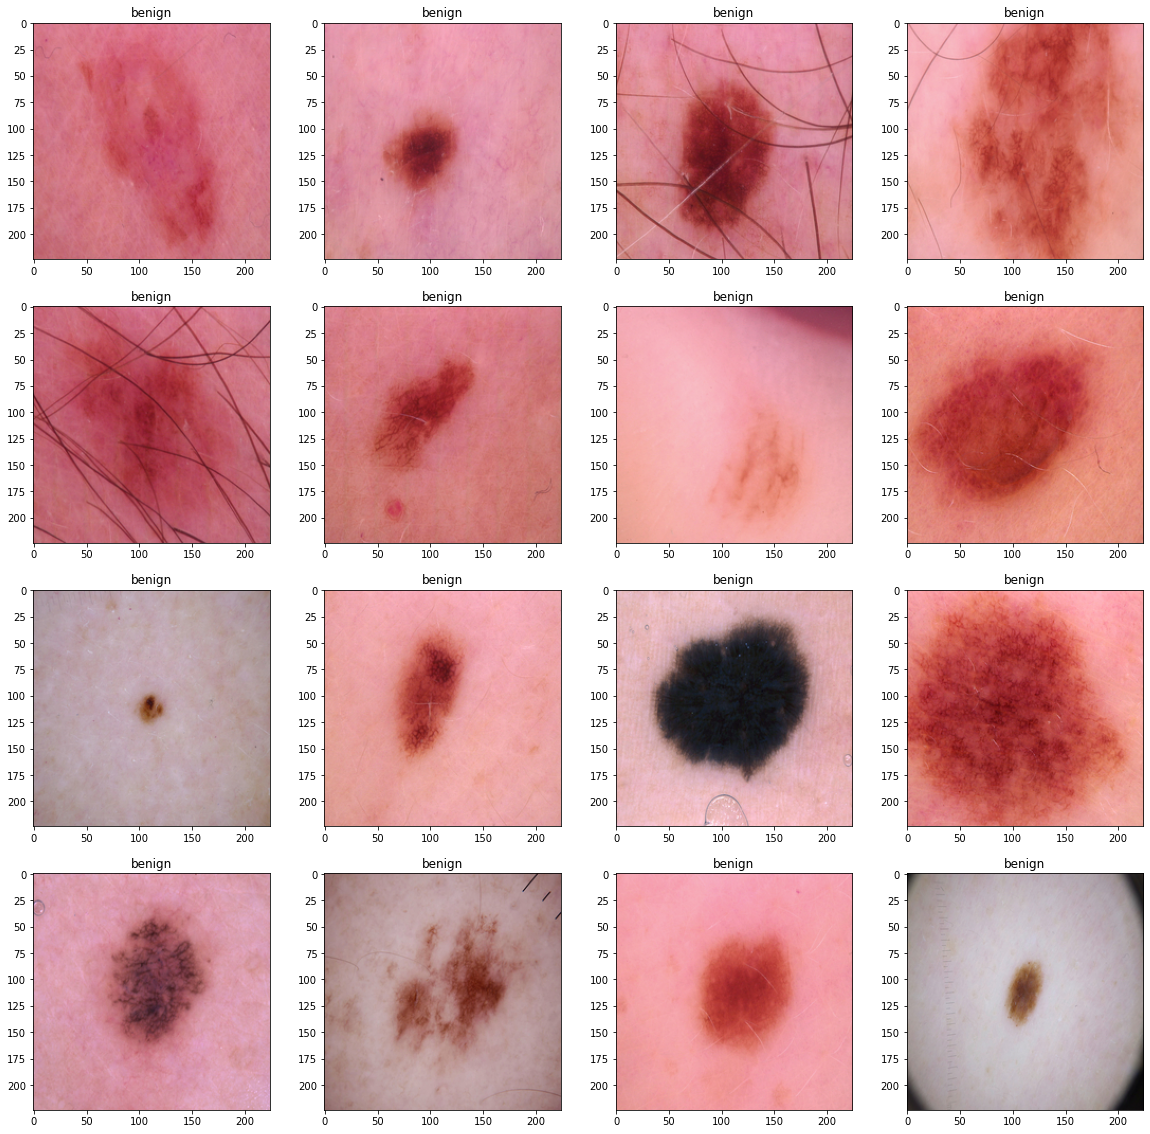

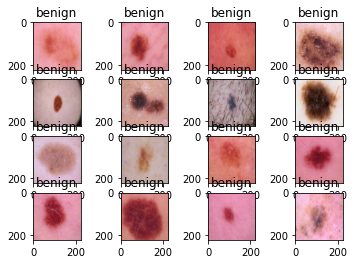

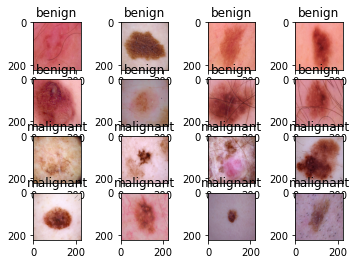

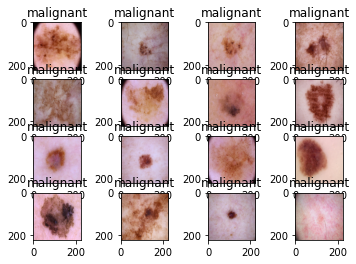

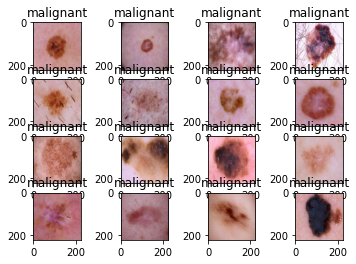

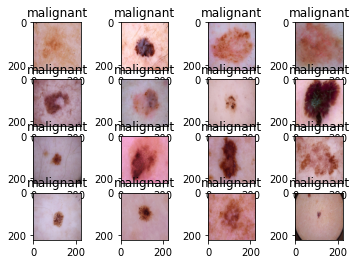

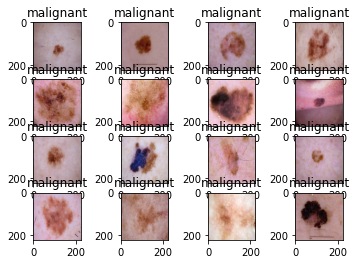

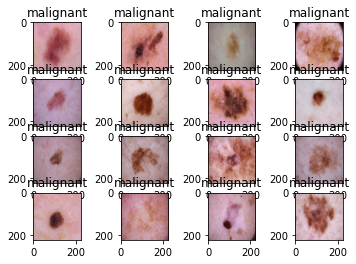

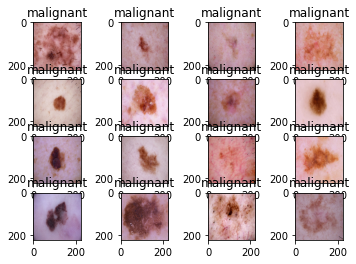

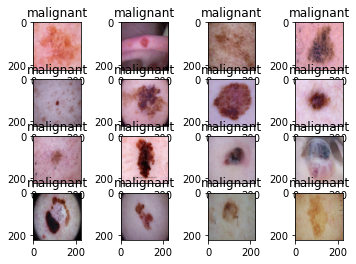

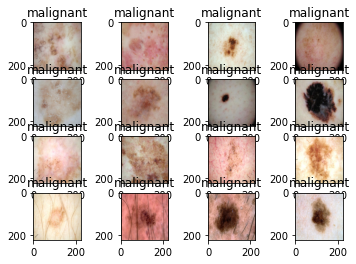

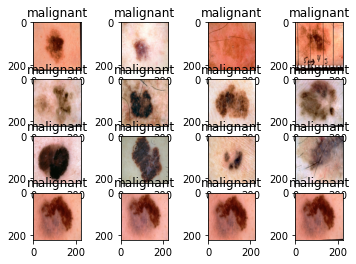

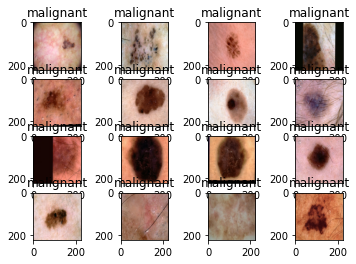

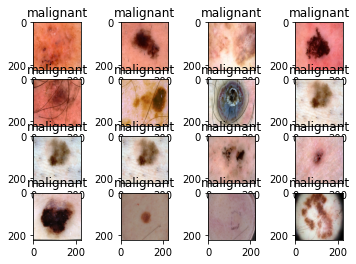

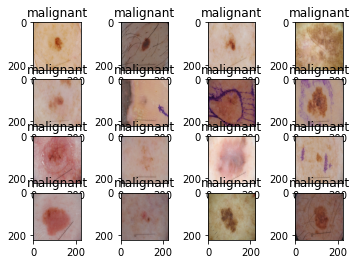

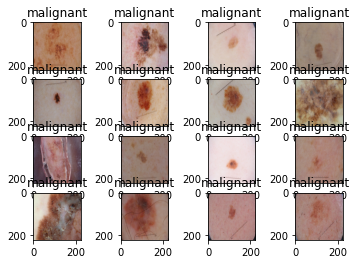

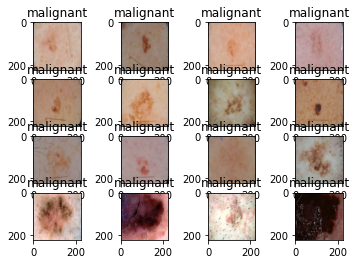

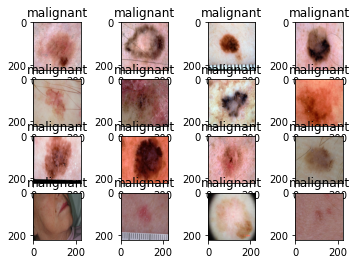

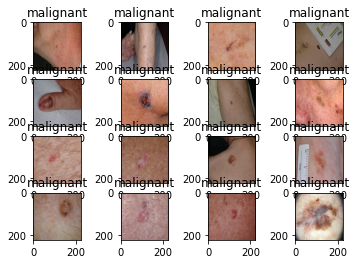

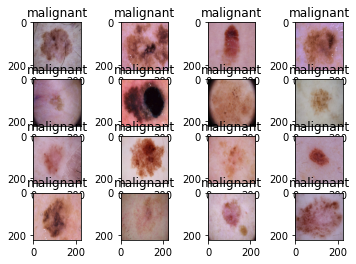

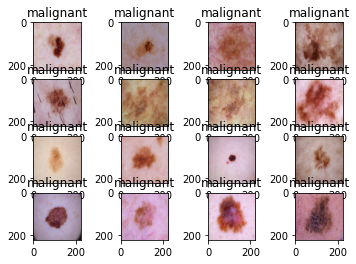

IndexError: index 4 is out of bounds for axis 0 with size 4

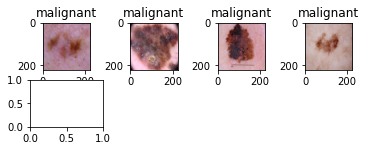

In [17]:
classes=list(test_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in test_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
break

In [25]:
from tensorflow import keras
# Creating the model using the Sequential API
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=7, strides=1, 
                padding="same", activation=keras.layers.LeakyReLU(alpha=0.02), name="Conv1", input_shape= (224,224,3)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=5, strides=1, 
                padding="same", activation=keras.layers.LeakyReLU(alpha=0.02), name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, 
                padding="same", activation=keras.layers.LeakyReLU(alpha=0.02), name="Conv3"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))
model.add(keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.02), name="Dense1"))
model.add(keras.layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.02), name="Dense2"))
model.add(keras.layers.Dense(2, activation="softmax", name="Output"))

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 224, 224, 64)      9472      
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 112, 112, 128)     204928    
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 56, 56, 256)       295168    
_________________________________________________________________
Pool3 (MaxPooling2D)         (None, 28, 28, 256)       0         
_________________________________________________________________
Flatten1 (Flatten)           (None, 200704)           

In [26]:
# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, clipvalue=1.0)
# optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, clipvalue=1.0)

model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

# Learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.00001, patience=5,
                                      monitor="val_accuracy", min_lr=0.0000001)

# Interrupts training when it measures no progress on the validation set
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, monitor = "val_loss",
                                                  restore_best_weights=True)


# Training the model
history = model.fit(train_generator,
                    steps_per_epoch = len(train_generator) ,
                    epochs          = 10,  
                    validation_data = valid_generator, 
                    validation_steps=len(valid_generator),
                    callbacks = [lr_scheduler, early_stopping_cb])


Epoch 1/10
149/149 [==============================] - 14s 90ms/step - loss: 0.9253 - accuracy: 0.5274 - val_loss: 0.6894 - val_accuracy: 0.5475
Epoch 2/10
149/149 [==============================] - 14s 94ms/step - loss: 0.6899 - accuracy: 0.5497 - val_loss: 0.6703 - val_accuracy: 0.5475
Epoch 3/10
149/149 [==============================] - 14s 90ms/step - loss: 2.4754 - accuracy: 0.5788 - val_loss: 0.5668 - val_accuracy: 0.6464
Epoch 4/10
149/149 [==============================] - 14s 96ms/step - loss: 0.6126 - accuracy: 0.6870 - val_loss: 0.5753 - val_accuracy: 0.5932
Epoch 5/10
149/149 [==============================] - 13s 90ms/step - loss: 0.5644 - accuracy: 0.7056 - val_loss: 0.5424 - val_accuracy: 0.7034
Epoch 6/10
149/149 [==============================] - 14s 95ms/step - loss: 0.5261 - accuracy: 0.7355 - val_loss: 0.4921 - val_accuracy: 0.7414
Epoch 7/10
149/149 [==============================] - 15s 98ms/step - loss: 0.4839 - accuracy: 0.7595 - val_loss: 0.4670 - val_accuracy:

In [27]:
#plotting training values
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

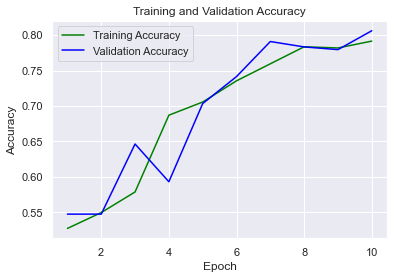

In [28]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

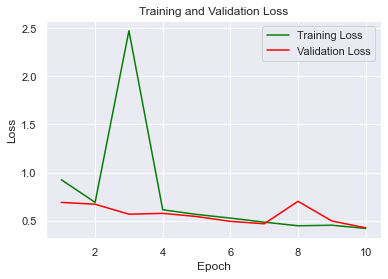

In [29]:
plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

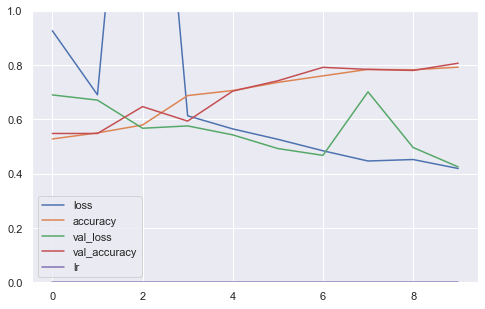

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
predictions = model.predict(test_generator)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, predictions.argmax(axis=-1)))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       360
           1       0.74      0.89      0.81       300

    accuracy                           0.81       660
   macro avg       0.82      0.81      0.81       660
weighted avg       0.82      0.81      0.81       660



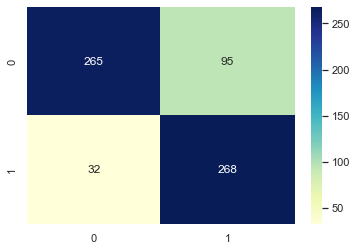

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, predictions.argmax(axis=-1))

sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [ ]:
img = cv2.imread("Y2.jpg")
H,W,C = 224,224,3
img = cv2.resize(img, (H, W)) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img = np.array(img)
img = img.astype("float32")  
img = img / 255.0

img = img.reshape(1,H,W,C)
print(img.shape)

prediction = np.argmax(model.predict(img),axis=-1)
print(prediction)


In [ ]:
# https://gradio.app/docs/

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests
import cv2

def inference(img):
    labels =['benign', 'malignant']
    H,W,C = 224,224,3
    img = cv2.resize(img, (H, W)) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2BGR)
    img = np.array(img)
    img = img.astype("float32")/255.0
    img = img.reshape(1,H,W,C)
    pred = model.predict(img).flatten()
    prediction = [pred[0], pred[1]]
    dictionary = dict(zip(labels, map(float, prediction)))
    return dictionary

nbr_top_classes = 2
gr.Interface(fn=inference, 
             inputs=gr.inputs.Image(), 
             outputs=gr.outputs.Label(num_top_classes=nbr_top_classes),
             theme="dark"
             ).launch(share=True) #, debug=True Use in Colab
